In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn import metrics
import matplotlib.pyplot as plt

<h2>Import data set<h2>

In [3]:
data=pd.read_csv("complete_data.csv")
data
# 0 - Fibrilacion Atrial
# 1 - Congestión cardíaca
# 2 - Infarto al miocardio

,case,record,condition,cond_id,length,ae_mean,ae_variance,ae_skewness,ae_spectral_entropy,se_mean,...,dfa_skewness,dfa_spectral_entropy,psd_mean,psd_variance,psd_skewness,psd_spectral_entropy,hst_mean,hst_variance,hst_skewness,hst_spectral_entropy
0,p013259,3160963_0003,congestive_heartfailure,1,9298,0.647493,0.002654,-0.364385,1.602301,0.572303,...,-0.238522,1.813809,0.647212,0.010767,-0.271652,1.823859,0.033024,0.000654,-0.363400,2.893316
1,p002301,3997084_0005,congestive_heartfailure,1,6966,1.019846,0.051613,-3.496335,3.437762,0.901530,...,0.171172,2.531592,0.886865,0.030350,4.598883,3.642039,0.149075,0.011090,3.446796,3.395791
2,p002301,3997084_0009,congestive_heartfailure,1,32876,0.921765,0.033204,-1.000909,3.263621,0.683735,...,-0.072598,3.477169,0.976094,0.011880,0.245124,2.794989,0.144738,0.002401,0.550122,4.527932
3,p002301,3997084_0011,congestive_heartfailure,1,8479,1.018972,0.019299,0.217564,2.510086,0.698120,...,-0.504723,3.169939,1.018889,0.001953,-0.216696,3.379764,0.116002,0.001449,-0.128817,3.375357
4,p002301,3997084_0015,congestive_heartfailure,1,25109,0.953086,0.012919,-0.675644,4.345543,0.745497,...,0.249928,4.957422,0.950054,0.003002,1.170946,4.599694,0.150494,0.004536,1.337027,4.189462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18217,p098347,3954001_0198,congestive_heartfailure,1,11588,0.592128,0.061313,-0.214702,2.065008,0.494335,...,-0.527879,2.352396,0.590155,0.031546,-1.080919,1.912921,0.038325,0.001427,2.863040,3.712695
18218,p098347,3954001_0201,congestive_heartfailure,1,3749,0.612485,0.046043,-1.724214,2.316535,0.535639,...,1.261620,1.489856,0.804268,0.086023,2.640005,2.437046,0.090858,0.031447,3.124302,2.573556
18219,p098347,3954001_0213,congestive_heartfailure,1,15626,0.798957,0.014990,-0.265130,3.714690,0.738482,...,0.674673,3.405851,0.764127,0.003517,-0.859689,3.714658,0.026720,0.000998,3.957342,4.487133
18220,p098347,3954001_0228,congestive_heartfailure,1,3053,0.307336,0.016550,-1.070943,2.123888,0.218783,...,0.663699,1.118300,0.515476,0.168657,2.535542,2.205370,0.077795,0.048628,2.844713,2.321460


<h2>Clean dataset<h2>

In [4]:
#Extract metrics
data = data[["cond_id","hst_mean","hst_variance","ae_mean","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]

data = data.dropna()
#data = data[ data["hurst"] >= 0.1]
data

,cond_id,hst_mean,hst_variance,ae_mean,ae_variance,ae_skewness,ae_spectral_entropy,se_mean,se_variance,se_skewness,...,hfd_skewness,hfd_spectral_entropy,dfa_mean,dfa_variance,dfa_skewness,dfa_spectral_entropy,psd_mean,psd_variance,psd_skewness,psd_spectral_entropy
0,1,0.033024,0.000654,0.647493,0.002654,-0.364385,1.602301,0.572303,0.001357,-0.261338,...,-0.089497,3.122093,0.299098,0.004980,-0.238522,1.813809,0.647212,0.010767,-0.271652,1.823859
1,1,0.149075,0.011090,1.019846,0.051613,-3.496335,3.437762,0.901530,0.047658,-2.545573,...,-0.757325,2.313477,0.444987,0.001013,0.171172,2.531592,0.886865,0.030350,4.598883,3.642039
2,1,0.144738,0.002401,0.921765,0.033204,-1.000909,3.263621,0.683735,0.061125,-0.111912,...,-0.396855,2.512676,0.547563,0.006213,-0.072598,3.477169,0.976094,0.011880,0.245124,2.794989
3,1,0.116002,0.001449,1.018972,0.019299,0.217564,2.510086,0.698120,0.024476,0.121061,...,0.348624,2.763180,0.599209,0.002594,-0.504723,3.169939,1.018889,0.001953,-0.216696,3.379764
4,1,0.150494,0.004536,0.953086,0.012919,-0.675644,4.345543,0.745497,0.037952,0.026032,...,-0.761307,4.289052,0.555412,0.002733,0.249928,4.957422,0.950054,0.003002,1.170946,4.599694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18217,1,0.038325,0.001427,0.592128,0.061313,-0.214702,2.065008,0.494335,0.060120,0.138544,...,2.994217,3.893540,0.271613,0.007350,-0.527879,2.352396,0.590155,0.031546,-1.080919,1.912921
18218,1,0.090858,0.031447,0.612485,0.046043,-1.724214,2.316535,0.535639,0.041048,-1.055843,...,-2.358765,2.195608,0.279220,0.001360,1.261620,1.489856,0.804268,0.086023,2.640005,2.437046
18219,1,0.026720,0.000998,0.798957,0.014990,-0.265130,3.714690,0.738482,0.020846,-0.211643,...,-0.045611,3.277705,0.290516,0.002011,0.674673,3.405851,0.764127,0.003517,-0.859689,3.714658
18220,1,0.077795,0.048628,0.307336,0.016550,-1.070943,2.123888,0.218783,0.014075,0.139029,...,0.096642,1.930652,0.216381,0.004587,0.663699,1.118300,0.515476,0.168657,2.535542,2.205370


<h2>Define train set and targets<h2>

In [5]:
#Group by pathology
a_f=data[data["cond_id"] ==0]
c_c=data[data["cond_id"] ==1]
m_i=data[data["cond_id"] ==2]

#Extract important metrics
atrial_f = a_f[["ae_mean","hst_mean","hst_variance","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]
congestive_h = c_c[["ae_mean","hst_mean","hst_variance","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]
myocardial_i = m_i[["ae_mean","hst_mean","hst_variance","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]

atrial_f_m = a_f[["hst_mean","hst_variance","dfa_mean","dfa_variance","se_mean","se_variance","ae_variance","psd_mean","psd_variance","hfd_mean","hfd_variance"]]
congestive_h_m = c_c[["hst_mean","hst_variance","dfa_mean","dfa_variance","se_mean","se_variance","ae_mean","ae_variance","psd_mean","psd_variance","hfd_mean","hfd_variance"]]
myocardial_i_m = m_i[["hst_mean","hst_variance","dfa_mean","dfa_variance","se_mean","se_variance","ae_mean","ae_variance","psd_mean","psd_variance","hfd_mean","hfd_variance"]]

#Create target array for training
targets=a_f['cond_id'].tolist()+m_i['cond_id'].tolist()+c_c['cond_id'].tolist()

#Create input array for training
X=pd.concat([atrial_f_m,myocardial_i_m,congestive_h_m],ignore_index=True)
X
print(len(a_f))
print(len(c_c))
print(len(m_i))
print(len(a_f)+len(c_c)+len(m_i))

1052
9591
6109
16752


<h2>PCA<h2>

In [71]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=8)
pca_af = pca.fit(atrial_f_m).transform(atrial_f_m)
pca_chf = pca.fit(congestive_h_m).transform(congestive_h_m)
pca_mi = pca.fit(myocardial_i_m).transform(myocardial_i_m)

fig = plt.figure()
ax = Axes3D(fig)

for i in range(0,len(pca_af)):
    a = plt.scatter(pca_af[i,0],pca_af[i,1],pca_af[i,2],color='#FF8427',alpha=0.5)
        
for i in range(0,len(pca_chf)):      
    b = plt.scatter(pca_chf[i,0],pca_chf[i,1],pca_chf[i,2],color='#04A777',alpha=0.5)
            
for i in range(0,len(pca_mi)):
    c = plt.scatter(pca_mi[i,0],pca_mi[i,1],pca_mi[i,2],color="#083D77",alpha=0.5)

plt.title("PCA")
ax.set_xlabel('Componente P 1')
ax.set_ylabel('Componente P 2')
ax.set_zlabel('Componente P 3')
plt.legend((a,b,c),("AF","CHF","MI"))
plt.xlim(-1.5,1)
plt.ylim(-1,0.75)
ax.set_zlim(-1.742777e-01,3.336274e-01)
for angle in range(0, 360):
    ax.view_init(30, 40)
    
fig.savefig("PCA(patologias).png")

Accuracy :  0.9036108624291256


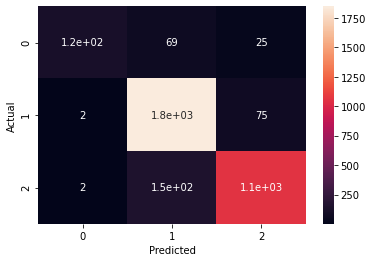

In [6]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier

pca = PCA(n_components=9)
pca_af = pca.fit(atrial_f_m).transform(atrial_f_m)
pca_chf = pca.fit(congestive_h_m).transform(congestive_h_m)
pca_mi = pca.fit(myocardial_i_m).transform(myocardial_i_m)

pca_af1 = pd.DataFrame(pca_af)
pca_chf2 = pd.DataFrame(pca_chf)
pca_mi3 = pd.DataFrame(pca_mi)

y1= a_f['cond_id'].tolist()
y2= c_c['cond_id'].tolist()
y3= m_i['cond_id'].tolist()

y=y1+y2+y3
p=np.array(y)

X=pd.concat([pca_af1,pca_chf2,pca_mi3],ignore_index=True)

X_train,X_test,y_train,y_test = train_test_split(X,p,test_size=0.2,random_state=1)

from sklearn.ensemble import ExtraTreesClassifier

classifier = ExtraTreesClassifier()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

classifier.fit(X_train, y_train)

X_test = sc.fit_transform(X_test)
y_pred = classifier.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))

confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


[[0.04 0.96]
 [0.04 0.96]
 [0.   1.  ]
 ...
 [0.16 0.84]
 [0.02 0.98]
 [0.16 0.84]]
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.990


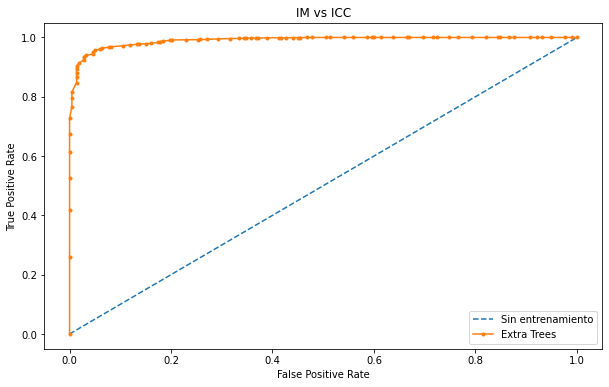

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = classifier.predict_proba(X_test)
print(lr_probs)
lr_probs = lr_probs[:,1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

fig = plt.figure(figsize=(10,6))

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenamiento')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Extra Trees')

plt.title("IM vs ICC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
fig.savefig('ROC_IMvsICC.png')


Extra trees: f1=0.976 auc=0.999


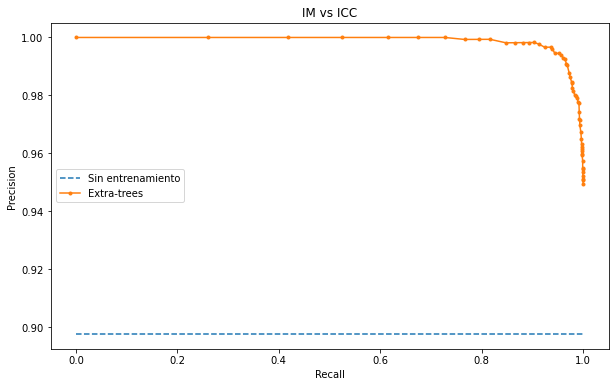

In [61]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

fig = plt.figure(figsize=(10,6))
lr_probs = classifier.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
yhat = classifier.predict(X_test)

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

print('Extra trees: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenamiento')
plt.plot(lr_recall, lr_precision, marker='.', label='Extra-trees')

plt.title('IM vs ICC')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
fig.savefig('r-c_AFvsIM.png')


<h2>LDA<h2>

633
196


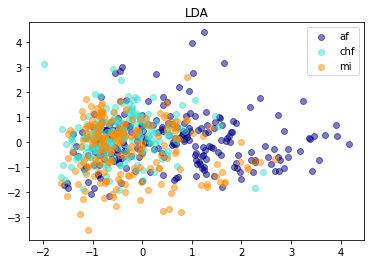

In [286]:
from sklearn import datasets
lda = LinearDiscriminantAnalysis(n_components=2)


target_names = ['af','chf','mi']

y1= a_f['cond_id'].tolist()
y2= c_c['cond_id'].tolist()
y3= m_i['cond_id'].tolist()
t= y1+y2+y3

lda_data = lda.fit(X, t).transform(X)
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

p= np.array(t)

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(lda_data[p == i, 0], lda_data[p == i, 1], alpha=.5, color=color,label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA')
print(len(lda_data))
print(len(y3))

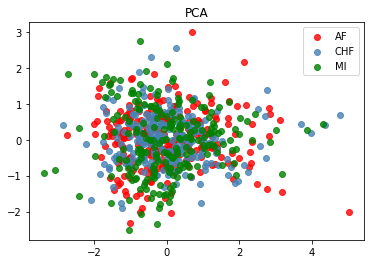

In [258]:
pca = PCA(n_components=2)

lda_af = lda_data[0:249]
lda_chf = lda_data[249:470]
lda_mi = lda_data[470:684]

pca_af2 = pca.fit(lda_af).transform(lda_af)
pca_chf2 = pca.fit(lda_chf).transform(lda_chf)
pca_mi2 = pca.fit(lda_mi).transform(lda_mi)

for i in range(0,len(pca_af2)):
    a = plt.scatter(pca_af2[i,0],pca_af2[i,1],color='red',alpha=0.8)
        
for i in range(0,len(pca_chf2)):      
    b = plt.scatter(pca_chf2[i,0],pca_chf2[i,1],color='steelblue',alpha=0.8)
            
for i in range(0,len(pca_mi2)):
    c = plt.scatter(pca_mi2[i,0],pca_mi2[i,1],color="green",alpha=0.8)
    
plt.title("PCA")
ax.set_xlabel('Componente P 1')
ax.set_ylabel('Componente P 2')
plt.legend((a,b,c),("AF","CHF","MI"))

<h2>Histograms<h2>

C:\Users\jcruz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jcruz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jcruz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

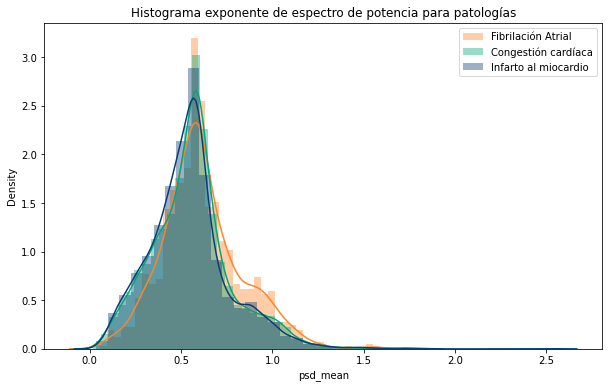

In [10]:
dfa_af=a_f["psd_mean"]
dfa_cc=c_c["psd_mean"]
dfa_mi=m_i["psd_mean"]

fig = plt.figure(figsize=(10,6))

sn.distplot(a=dfa_af,bins=40,color='#FF8427',kde=True,label="Fibrilación Atrial")
sn.distplot(a=dfa_cc,bins=40,color='#04A777',kde=True,label="Congestión cardíaca")
sn.distplot(a=dfa_mi,bins=40,color='#083D77',kde=True,label="Infarto al miocardio")

plt.title("Histograma exponente de espectro de potencia para patologías")
plt.legend()
fig.savefig("graf/h3/hist_psd(s).png")

<h2>Scatter plots<h2>

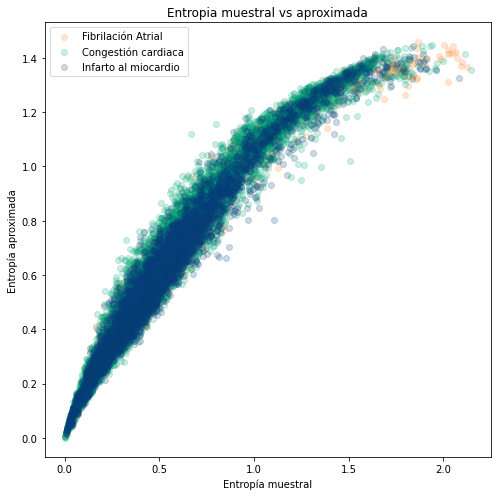

In [14]:
np_pop = np.array(atrial_f["psd_mean"])*100
np_pop1 = np.array(congestive_h["psd_mean"])*100
np_pop2 = np.array(myocardial_i["psd_mean"])*100

fig = plt.figure(figsize=(8,8))
a=plt.scatter(atrial_f["se_mean"],atrial_f["ae_mean"],color='#FF8427',alpha=0.2)
b=plt.scatter(congestive_h["se_mean"],congestive_h["ae_mean"],color='#04A777',alpha=0.2)
c=plt.scatter(myocardial_i["se_mean"],myocardial_i["ae_mean"],color='#083D77',alpha=0.2)

plt.title("Entropia muestral vs aproximada")
plt.legend((a,b,c),("Fibrilación Atrial","Congestión cardiaca","Infarto al miocardio"))
plt.axis
plt.xlabel("Entropía muestral")
plt.ylabel("Entropía aproximada")
plt.savefig(('graf/s3/scatter(sevsae)p.png'))
plt.show()

<h2>Train datasets<h2>

In [139]:
#Split data to test and train groups
X_train,X_test,y_train,y_test = train_test_split(X,targets,test_size=0.20,random_state=1)
print(len(X_train))
print(len(y_train))

526
526


<h2>Logistic regression <h2>

Accuracy:  0.33070866141732286


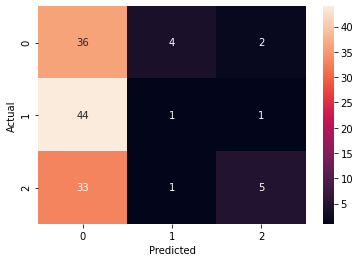

In [373]:
from sklearn.preprocessing import StandardScaler

#Logistic Regression function
logistic_regression= LogisticRegression(max_iter=20000)
sc = StandardScaler()

#Training
X_train = sc.fit_transform(X_train)
logistic_regression.fit(X_train,y_train)
X_test = sc.fit_transform(X_test)

#Testing
y_pred=logistic_regression.predict(X_test)
y_test=np.array(y_test)

#Confussion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

<h2>K nearest neightbors<h2>

In [141]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

#Scale train set
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Training
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)

#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))

#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

knn.kneighbors_graph()

Accuracy of K-NN classifier on training set: 0.76
Accuracy of K-NN classifier on test set: 0.55


<526x526 sparse matrix of type '<class 'numpy.float64'>'
	with 1578 stored elements in Compressed Sparse Row format>

<h2>Gaussian Naive Bayes<h2>

In [142]:
from sklearn.naive_bayes import GaussianNB

#Gaussian Function
gnb = GaussianNB()

#Training
y_pred = gnb.fit(X_train, y_train).predict(X_test)

#Testing
print("Number of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != y_pred).sum()))
acc=1-(y_test != y_pred).sum()/X_test.shape[0]
print("Accuracy : ", acc)

Number of mislabeled points out of a total 132 points : 72
Accuracy :  0.4545454545454546


<h2>Bernoulli Naive Bayes<h2>

In [168]:
from sklearn.naive_bayes import BernoulliNB

#Bernoulli function
bnb = BernoulliNB()

#Training
y_pred = bnb.fit(X_train, y_train).predict(X_test)

#Testing
print("Number of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != y_pred).sum()))
acc=1-(y_test != y_pred).sum()/X_test.shape[0]
print("Accuracy : ", acc)

Number of mislabeled points out of a total 137 points : 74
Accuracy :  0.45985401459854014


<h2>Multi-layer Perceptron<h2>

0.3779527559055118


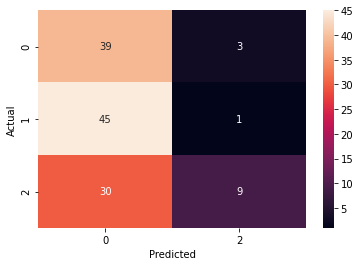

In [371]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

#Scale training data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

#Neural Network
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1,max_iter=20000)

#Training
clf.fit(X_train, y_train)
X_test = sc.fit_transform(X_test)

#Score
y_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))

#Confussion matrix
confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

<h2>Random forest<h2>


Accuracy :  0.7244094488188977


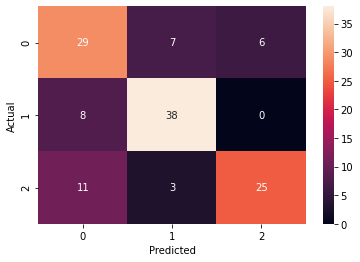

In [374]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


classifier = RandomForestClassifier()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

classifier.fit(X_train, y_train)

X_test = sc.fit_transform(X_test)
y_pred = classifier.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))

confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


<h2>Extra trees classifier<h2>

Accuracy :  0.8110236220472441


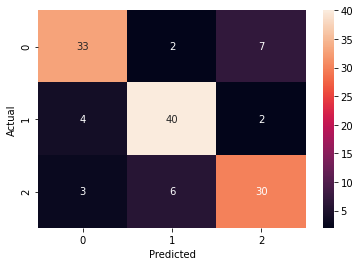

In [375]:
from sklearn.ensemble import ExtraTreesClassifier

classifier = ExtraTreesClassifier()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

classifier.fit(X_train, y_train)

X_test = sc.fit_transform(X_test)
y_pred = classifier.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))

confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

<h2>Ada Boost<h2>

Accuracy :  0.8110236220472441


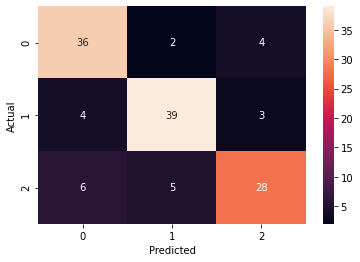

In [370]:
from sklearn.ensemble import AdaBoostClassifier

cassifier = AdaBoostClassifier(n_estimators=100)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))

confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


<h2>Voting Classifier<h2>

In [252]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5) 
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.62 (+/- 0.02) [Ensemble]


In [ ]:
import 